# ARIMA and Seasonal ARIMA

Autoregressive Integrated Moving Averages


<ol>
The General Process for ARIMA model is the following 

<li>visualize the time series data</li>
<li>Make the time series data stationary</li>
<li>Plot the correlation and autocorrelation charts</li>
<li>construct the ARIMA model or seasonal ARIMA based on the data</li>
<li>use the model to make predictions</li>
</ul>

In [1]:
#date_time column is independent variable
#sales or passengers or customers or crimes...etc are dependent varibale,,,which varies with date_time variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# sns.get_dataset_names()#u should be online to run this command

In [4]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# df.to_csv('sns_flights.csv')


In [6]:
df=pd.read_csv('sns_flights.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
#bcz last date of each month is diff...so i am taking 1st date of each month for consideration.
df['yearmonth'] = '01-'+df['year'].astype(str)+'-'+df['month'].astype(str)+'-'
df.head()

,year,month,passengers,yearmonth
0,1949,Jan,112,01-1949-Jan-
1,1949,Feb,118,01-1949-Feb-
2,1949,Mar,132,01-1949-Mar-
3,1949,Apr,129,01-1949-Apr-
4,1949,May,121,01-1949-May-


In [8]:
df['yearmonth'] = pd.to_datetime(df['yearmonth'])
df.head()#yyyy-mm-dd  format

,year,month,passengers,yearmonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [9]:
df.set_index('yearmonth',inplace=True)
df.head()

,year,month,passengers
yearmonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearmonth', ylabel='passengers'>

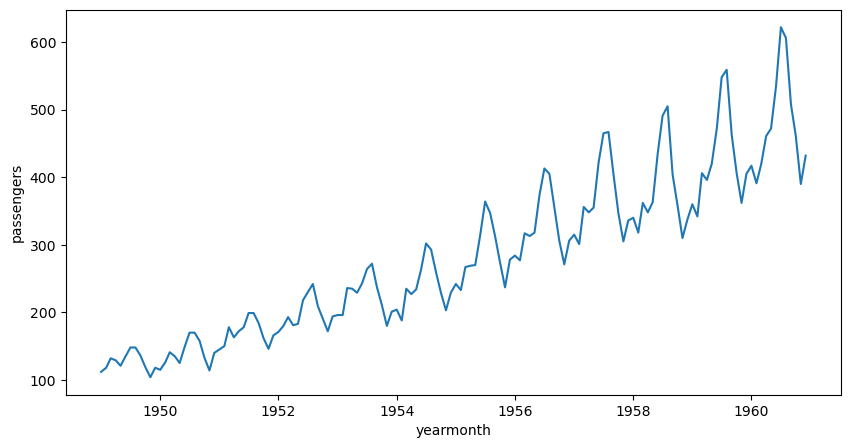

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['passengers'])

In [11]:
#time series grahps are usually classified into 4 categories or 4 patterns
#1)Trend 2)seasonal 3)cyclic 4)regular 5)stationarity

In [12]:
#1)Trend -> either dependent variable increases with time(independent variable) OR decreases with time(independent variable)

In [13]:
#2)Seasonal  -> take ice cream datatset,,,where sales of ice creams increases in month april to jun each year......and in remaining season sales are less,,,,,bcz each year same patterns are repeating with more or less same values.....this graph is called seasonal..
#during summer slaes increasing and during winter and rainy season sales is deceasing
#repatation of pattern with same freauency ,,,,then this is seasonal time series graph..
#patterns are repeating for specific time period in each year...not exactly  but more identical (more or less)

In [14]:
#3)cyclic -> pattern is continued for some time and after that it will go away,,and there is no fixed time period where this same pattern is continued again
#ex->recession phase,,,comes and goes away,,and there is no fixed time period where it will come so,,,,pattern is not arrived at specific time peiod...
#see graph

In [15]:
#4)irregular -> there is no any kind of pattern,,,,,see graph...we call it as noise in data

In [16]:
#by considering  above graph for flights datatset we can say that it has 2 patterns -> one is Trend(increasing with time) and 2nd is seasonl(patterns are repeating )
#

In [17]:
#if u train arima model on this datat then that model is turned out be 'overfitted' or 'high biased' or not accurate on test data
#ie;bcz graph is clearly showing ,as time passes no of passenger increasing(Trend),,,, and there is repeating pattern for specif period of time in each year....thus our model(ARIMA) simply predict that  ,in next year also no of passenger will increase compare to past years....
#and it will not predict the fall in passenger....so the model is highly biased.......towards increasing factor..


In [18]:
#so that convert this data graph from seasonal and trendy to stationary......

In [19]:
#First technically check and prove  whether there is stationarity in data or not using hypothesis testing......

In [20]:
#5)stationarity ->mean and variance of dependent variable dont varies w.r.t time
#ie;mean and variance remain's more or less same w.r.t time for all intervals..
#in this case 1 interval means 1 year....
#ie;mean and vaiance is same / almost same for each year or time interval.

In [21]:
#How to Check Stationarity ?
#1)ADF (Augmented Dickey-Fuller Test) ->we assume a null hypothesis where we assume that "data is non-stationary" and we will try to prove our null hypothesis is wrong..
#   if test Statistics < critical value  then data is stationary else data is non stationary
#2)Rolling statistics -> here we take rolling mean or rolling std or rolling variance and we will plot that to check stationarity of data/graph..

#second method ie;rolling statistics is easy one...

# Rolling Test

In [22]:
df['rollMean'] = df.passengers.rolling(window=12).mean()#window is a 'time frame' by which we want to roll mean.....1 interval =12 months or 1year.....calaculating mean for each year and comparing it other time frame......
df['rollStd'] = df.passengers.rolling(window=12).std()

<Axes: xlabel='yearmonth', ylabel='passengers'>

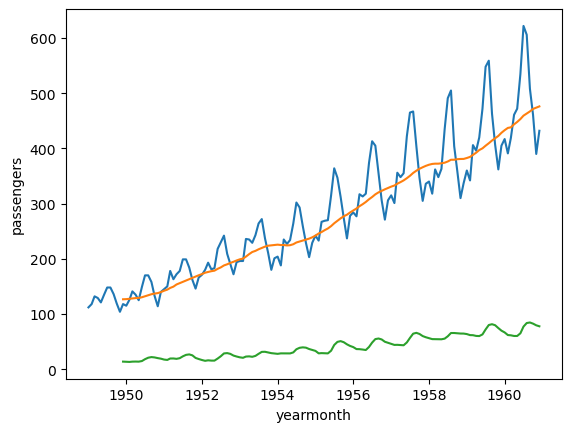

In [23]:
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df['rollMean'])#orange line represent rolling mean
sns.lineplot(data=df,x=df.index,y=df['rollStd'])#green line represent rolling std

In [24]:
#as u see mean is not constant , std is approximately/almost/more or less constant
#non-stationary mean and approximately stationary std  ie;it varies in each interval(time frame or year)
#and we clearly see ,,repeating pattern in data/time series,,,thus we can say this graph/data/time series as seasonal..

# ADF Test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adfTest = adfuller(df['passengers'],autolag='AIC')

In [27]:
adfTest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [28]:
# (0.8153688792060597,
#  0.9918802434376411,            -> test statistics
#  13,
#  130,                  

# {'1%': -3.4816817173418295,
#   '5%': -2.8840418343195267,      -> criticality
#   '10%': -2.578770059171598},
#  996.692930839019)

In [29]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observation used'])
stats

Test Statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
number of observation used    130.000000
dtype: float64

In [30]:
for key,values in adfTest[4].items():
    print('criticality',key,':',values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [31]:
#condition for stationarity is test statistics < criticality
#but as we see criticality < test statistics ....thus we can say that data/graph is "not stationary"............

# but ARIMA model requires stationary data....so we have to convert above data(seasonal and trendy) to stationary data

# Making Data Stationary

There are manly 3 primary ways to make data as stationary...
<ol>
    <li>Time shift</li>
     <li>Log</li>
     <li>Square Root , cube ......</li>
</ol>

In [32]:
#u can try them in any sequence,,and not need to try all ways,,,,,,but preffered to go from time shift -> Log -> square Root....
#if u get data as stationary in one way(either time shift or log or square root,cube....)only then not need to try other ways also.
#u can start model building..
#if u dont get stationary data or satisfactory data(data as u want) by applying all above ways then combine all ways and get the satisfactory data(data as u want for model building)


In [33]:
#1)time shift -> shifting data ....
#see image...where i have shifted data by 1 month...but u can sift data by 2,3,4,5,6..12....16...etc  onths also..
#ie;paasenger column data is shifted by 1 month...
#ie;passengers data of jan (1949-01-01) is shifted to feb(1949-02-01),,,as u see 112 is belogs to jan but we are shifted it to feb..see image.

In [34]:
#2)Log -> finding log value of dependent varibale(ie;passengers)
#log(112) -> 4.718499

In [35]:
#3)Square root,cube....-> finding square root of dependent variable....
#Squareroot(112) -> 10.583005

In [36]:
#u can combine all ways ...
#like first i can do log on dependent variable then result of it can be used for sqrt and result of it can be used for time shifting

In [37]:
#then plot the resultant column (if u applied only Log on dependent variable the our new dependent variable is that column  thus we have to plot it w.r.t date(rolling method bcz it is easy) to check graph/data become stationary or not)
#if yes then move to next step ie;model building else,,,perform other  set of ways(timeshift,log,sqrt,cube..etc)

In [38]:
def test_stationatity(dataFrame,var):
    dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()
    
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observation used'])
    print(stats)
    
    for key,values in adfTest[4].items():
        print('criticality',key,':',values)
    
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')
    
    
    

In [39]:
df.head()

,year,month,passengers,rollMean,rollStd
yearmonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [40]:
air_df=df[['passengers']]
air_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [41]:
#1)Time shift
air_df['shift'] = air_df.passengers.shift(1)
air_df['shiftDiff'] = air_df['passengers']-air_df['shift']#bydefault 1month shift is there...if u want more than that then pass integer value in shift method..
air_df.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\2726274138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift(1)
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\2726274138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers']-air_df['shift']#bydefault 1month shift is there...if u want more than that then pass integer value in shift method..


,passengers,shift,shiftDiff
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                 -2.829267
p-value                         0.054213
#lags used                     12.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()


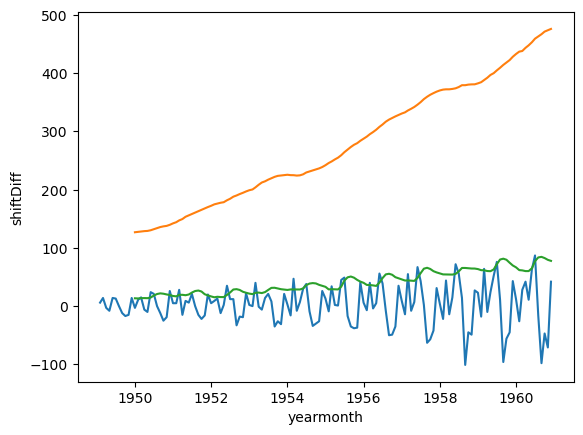

In [42]:
#now check stationarity after timeshift of 1month
#now shiftDiff is our dependent variable....
test_stationatity(air_df.dropna(),'shiftDiff')

In [43]:
#2)Log transformation
log_df = df[['passengers']]
log_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [44]:
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\1412135348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearmonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                 -1.717017
p-value                         0.422367
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()


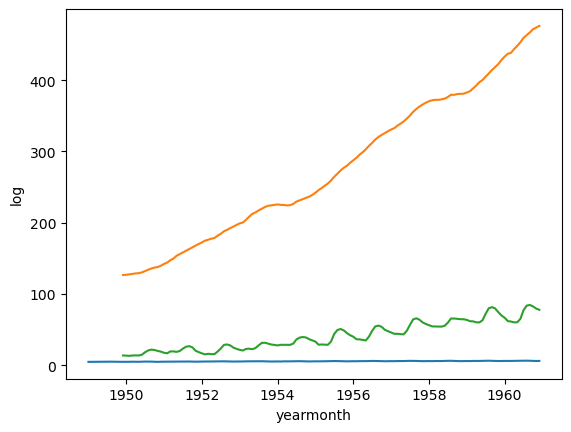

In [45]:
test_stationatity(log_df,'log')

In [46]:
#3)sqrt
sqrt_df = df[['passengers']]
sqrt_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])
sqrt_df.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\594852408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])


,passengers,sqrt
yearmonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()


Test Statistic                 -0.345854
p-value                         0.918754
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


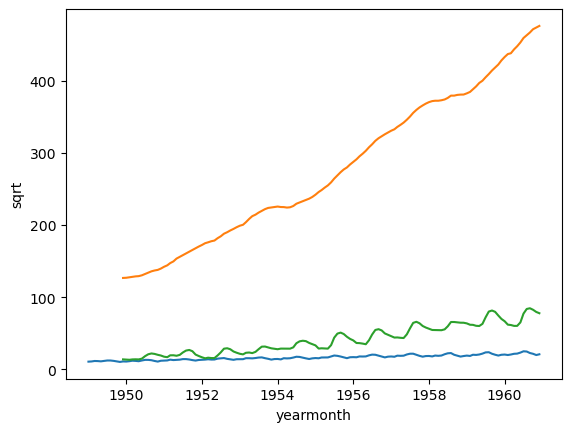

In [48]:
test_stationatity(sqrt_df,'sqrt')

In [49]:
#4)cbrt (cube root)
cbrt_df=df[['passengers']]
cbrt_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [50]:
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\2979180562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
yearmonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()


Test Statistic                 -0.810035
p-value                         0.816157
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


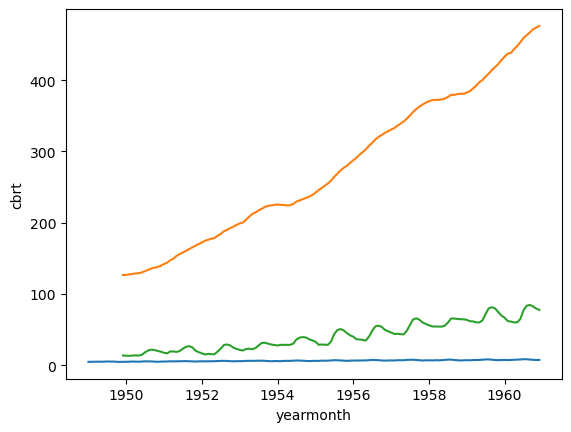

In [51]:
test_stationatity(cbrt_df,'cbrt')

In [52]:
#applying  log and sqrt together
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\4248259993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt
yearmonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


Test Statistic                 -1.942528
p-value                         0.312326
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


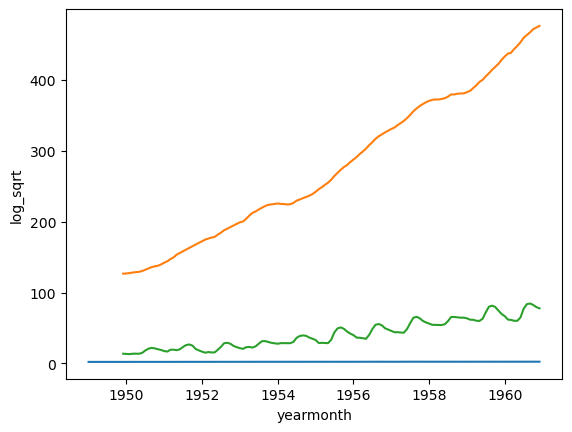

In [53]:
test_stationatity(log_df2,'log_sqrt')

In [54]:
#applying  log -> sqrt -> shift
log_df3 = log_df[['passengers','log']]
log_df3['log_sqrt'] = np.sqrt(log_df2['log'])
log_df3['logShiftDiff'] = log_df3['log_sqrt'] - log_df3['log_sqrt'].shift()
log_df3.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_13120\2069258002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df3['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt,logShiftDiff
yearmonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                 -2.611019
p-value                         0.090741
#lags used                     14.000000
number of observation used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame.passengers.rolling(window=12).mean()
C:\Users\shree\AppData\Local\Temp\ipykernel_13120\429080574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame.passengers.rolling(window=12).std()


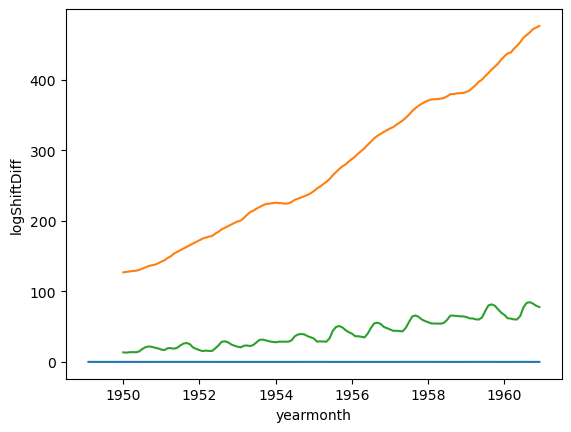

In [55]:
test_stationatity(log_df3.dropna(),'logShiftDiff')

In [56]:
#i am not getting stationary graph.....i have to try some more set of combination of methos
#now at this point i am studying so....i will consider this model and start model building to demonstrate how arima models is build for stationary data

# Model Building

In [57]:
#bcz i am not getting stationary data from original data,,,,,in this case iam using original data (seasonal + trendy) for model building..but if u get stationary data then it is well and good,,,thus we get "General fitted model".....


In [58]:
airP=df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()#automatically shift -> shift_diff is done.....
airP['Diff12'] = airP['passengers'].diff(12)#shift bu 12 months -> shift_diff

In [59]:
airP.head()

,passengers,firstDiff,Diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [60]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [61]:
#AR (p)->Auto Regressor...to find AR(p) value we check PACF->"Partial Auto Correlation Function"


#I (d)->integrated........shifting value......if d==1 then shift by 1 month,,,,exactly same only as Time shift


#MA (q)->moving Average...to find MA(q) value we check ACF->"Auto Correlation Function"

#see how these all mathamatically works....

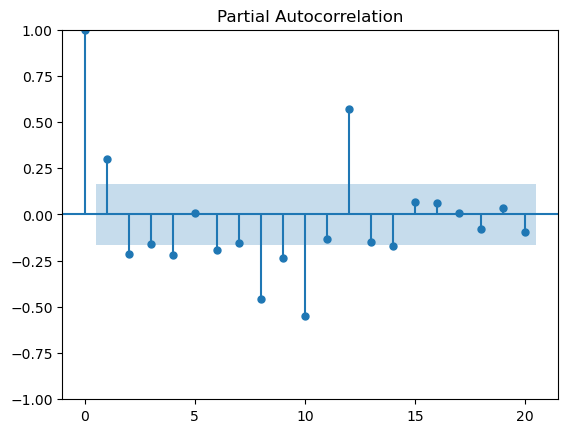

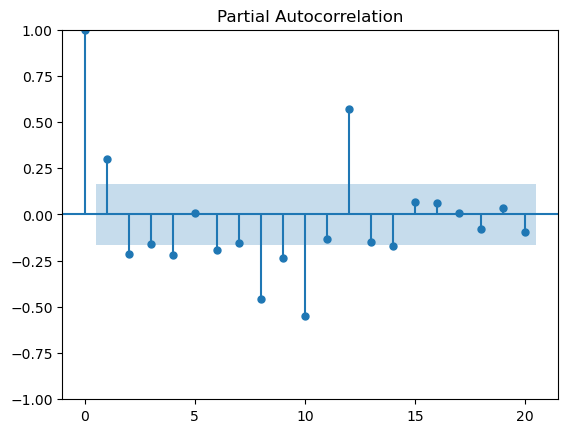

In [62]:
plot_pacf(airP['firstDiff'].dropna(),lags=20)#by seeing past 20 errors ,,prediction is done
#shaded area is insignifican area
#outside the shaded area which is white area is significant area.....
#thus points present in significant area ie;outside the blue shaded region or insignificant area is considered for 'p' value...
#select point which is exceeding shaded area.....
#p=1,2,4,...etc
#i will select p=1

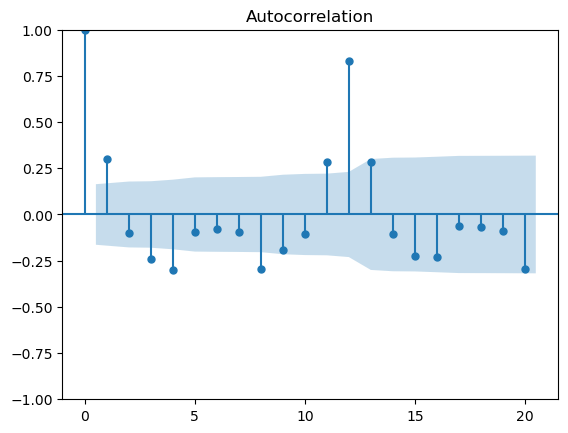

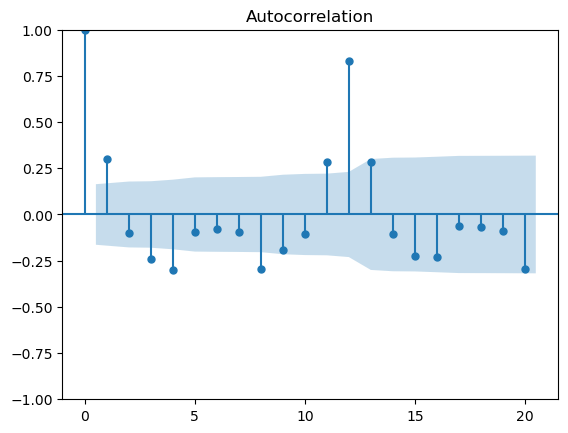

In [65]:
plot_acf(airP['firstDiff'].dropna(),lags=20)
#here also same...
#i have selected q=3

In [67]:
#p=1,q=3,d=1 (i want time shift =1 month),,u can choose any value for d...

# Train Test Split

In [69]:
airP

,passengers,firstDiff,Diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1960-08-01,606,-16.0,47.0
1960-09-01,508,-98.0,45.0
1960-10-01,461,-47.0,54.0


In [70]:
train = airP[:round(len(airP)*70/100)]
train

,passengers,firstDiff,Diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1957-01-01,315,9.0,31.0
1957-02-01,301,-14.0,24.0
1957-03-01,356,55.0,39.0


In [73]:
test = airP[round(len(airP)*70/100):]
test

,passengers,firstDiff,Diff12
yearmonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0
1957-11-01,305,-42.0,34.0
1957-12-01,336,31.0,30.0
1958-01-01,340,4.0,25.0
1958-02-01,318,-22.0,17.0


# ARIMA

In [76]:
#Training the ARIMA model
import statsmodels.api as sm

In [77]:
# model = ARIMA(train['passengers'],order=(1,1,3))#p,d,q
# model_fit = model.fit()  ->depricated
model = sm.tsa.arima.ARIMA(train['passengers'], order=(1,1,3))#p,d,q
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
#Testing the arima model

In [78]:
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])

In [81]:
round(prediction)

1957-06-01    363.0
1957-07-01    352.0
1957-08-01    347.0
1957-09-01    344.0
1957-10-01    343.0
1957-11-01    342.0
1957-12-01    342.0
1958-01-01    341.0
1958-02-01    341.0
1958-03-01    341.0
1958-04-01    341.0
1958-05-01    341.0
1958-06-01    341.0
1958-07-01    341.0
1958-08-01    341.0
1958-09-01    341.0
1958-10-01    341.0
1958-11-01    341.0
1958-12-01    341.0
1959-01-01    341.0
1959-02-01    341.0
1959-03-01    341.0
1959-04-01    341.0
1959-05-01    341.0
1959-06-01    341.0
1959-07-01    341.0
1959-08-01    341.0
1959-09-01    341.0
1959-10-01    341.0
1959-11-01    341.0
1959-12-01    341.0
1960-01-01    341.0
1960-02-01    341.0
1960-03-01    341.0
1960-04-01    341.0
1960-05-01    341.0
1960-06-01    341.0
1960-07-01    341.0
1960-08-01    341.0
1960-09-01    341.0
1960-10-01    341.0
1960-11-01    341.0
1960-12-01    341.0
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
test          #predicted no of passengers                       #actual no of passengers
#1957-06-01 -> 363.0     ,,                         1957-06-01 -> 422

,passengers,firstDiff,Diff12
yearmonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0
1957-11-01,305,-42.0,34.0
1957-12-01,336,31.0,30.0
1958-01-01,340,4.0,25.0
1958-02-01,318,-22.0,17.0


In [84]:
airP['arimaPredictions'] = prediction
airP.tail(43)
#bcz from last 43 rows are selected as test data

,passengers,firstDiff,Diff12,arimaPredictions
yearmonth,,,,
1957-06-01,422,67.0,48.0,363.295709
1957-07-01,465,43.0,52.0,351.699792
1957-08-01,467,2.0,62.0,346.961970
1957-09-01,404,-63.0,49.0,344.344094
1957-10-01,347,-57.0,41.0,342.897590
1957-11-01,305,-42.0,34.0,342.098327
1957-12-01,336,31.0,30.0,341.656695
1958-01-01,340,4.0,25.0,341.412672
1958-02-01,318,-22.0,17.0,341.277838


<Axes: xlabel='yearmonth', ylabel='passengers'>

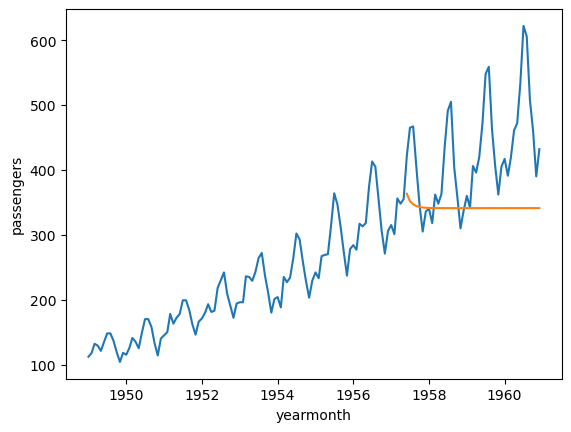

In [86]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPredictions')

In [87]:
#as u see arima model is not fitted on data,,,
#as u see there is more lag/error b/n actual test data o/p and predicted testd data o/p

In [88]:
from sklearn.metrics import mean_squared_error

In [90]:
np.sqrt(mean_squared_error(test['passengers'],prediction))
#as u see on an avg error/lag/gap b/n actual value and predicted value is 111
#which indicated it is not good model..

111.11010332461706

# SARIMAX

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [92]:
airP.head()

,passengers,firstDiff,Diff12,arimaPredictions
yearmonth,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


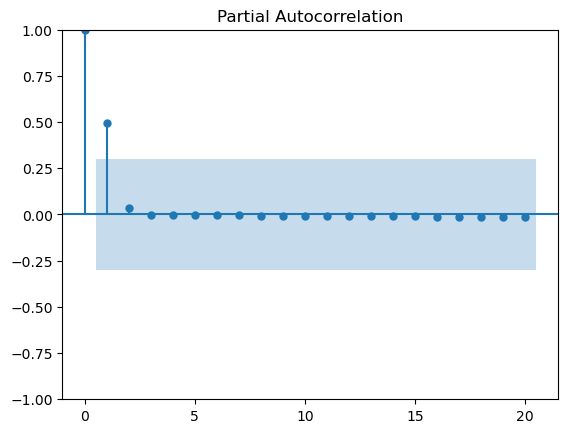

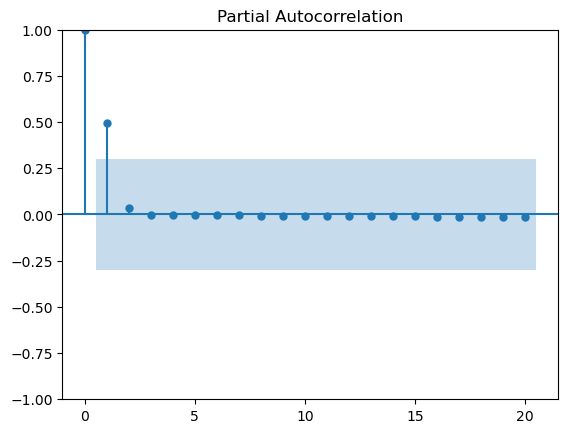

In [93]:
plot_pacf(airP['arimaPredictions'].dropna(),lags=20)
#here we dont have any significant points...
#thus we are going to put the value for p,d,q is same as we puuted in arima

In [94]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(1,1,3,12))#(p,d,q,seasonality_months)  ie;12 months seasonality we given

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
model_fit = model.fit()
predictions2 = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimax'] = predictions2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
airP.tail(43)

,passengers,firstDiff,Diff12,arimaPredictions,sarimax
yearmonth,,,,,
1957-06-01,422,67.0,48.0,363.295709,405.406757
1957-07-01,465,43.0,52.0,351.699792,449.315924
1957-08-01,467,2.0,62.0,346.961970,441.502524
1957-09-01,404,-63.0,49.0,344.344094,390.320585
1957-10-01,347,-57.0,41.0,342.897590,345.419013
1957-11-01,305,-42.0,34.0,342.098327,307.604013
1957-12-01,336,31.0,30.0,341.656695,344.254163
1958-01-01,340,4.0,25.0,341.412672,354.862012
1958-02-01,318,-22.0,17.0,341.277838,337.990092


# as u see (seasonal arimax) is performing better than arima bcz we given a seasonal data......
#if data is stationary then arima will work better

<Axes: xlabel='yearmonth', ylabel='passengers'>

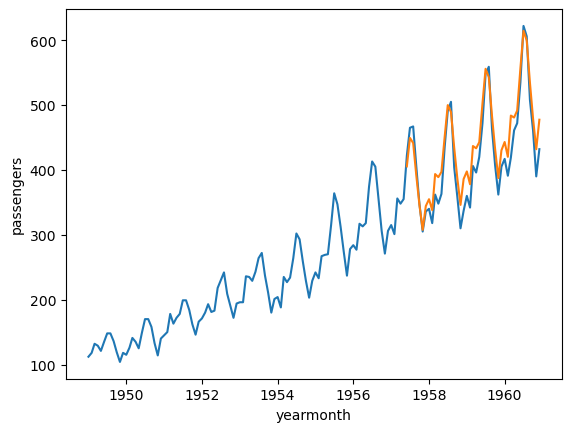

In [100]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimax')

In [101]:
# as u see sarimax is well'ly fitted on data,,,thus it is working better on test data also...
#bcz we given seasonal data to sarimax 
#sarimax works better on seasonal data
#arima works on stationary data

In [102]:
np.sqrt(mean_squared_error(test['passengers'],predictions2))

27.676847730073238

In [103]:
#model is general fitt...some error are there,,but it is okay..


# You can improve the performance of model by tuning the best value for p,d,q.......

# lets forecast

In [107]:
pd.date_range(start='1961-01-01',end='1962-12-01',freq='MS')#monthstart frequency

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [111]:
future_dates = pd.DataFrame(pd.date_range(start='1961-01-01',end='1962-12-01',freq='MS'),columns=['dates'])

In [112]:
future_dates.set_index('dates',inplace=True)

In [113]:
future_dates

""
dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01
1961-06-01
1961-07-01
1961-08-01
1961-09-01


In [115]:
future_prediction = model_fit.predict(start=future_dates.index[0],end=future_dates.index[-1])
future_prediction

1961-01-01    491.467879
1961-02-01    465.621182
1961-03-01    533.712106
1961-04-01    531.197123
1961-05-01    543.235609
1961-06-01    613.630027
1961-07-01    675.986283
1961-08-01    658.773495
1961-09-01    589.076950
1961-10-01    530.156435
1961-11-01    479.441824
1961-12-01    527.689533
1962-01-01    542.889156
1962-02-01    514.068455
1962-03-01    586.619454
1962-04-01    584.564468
1962-05-01    597.864853
1962-06-01    673.555501
1962-07-01    740.148812
1962-08-01    720.880863
1962-09-01    646.470801
1962-10-01    583.693331
1962-11-01    529.987691
1962-12-01    580.916397
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='dates', ylabel='predicted_mean'>

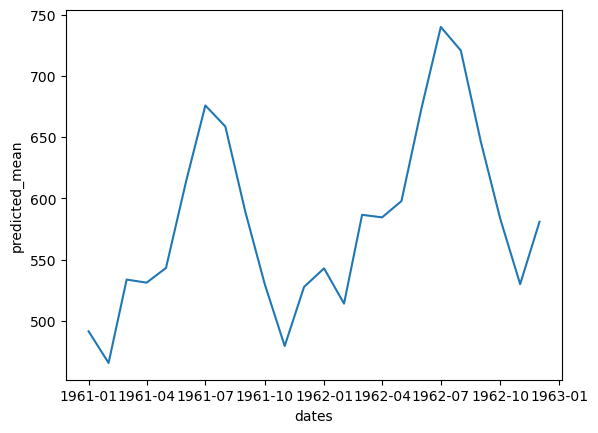

In [116]:
sns.lineplot(x=future_dates.index,y=future_prediction)

<Axes: xlabel='yearmonth', ylabel='passengers'>

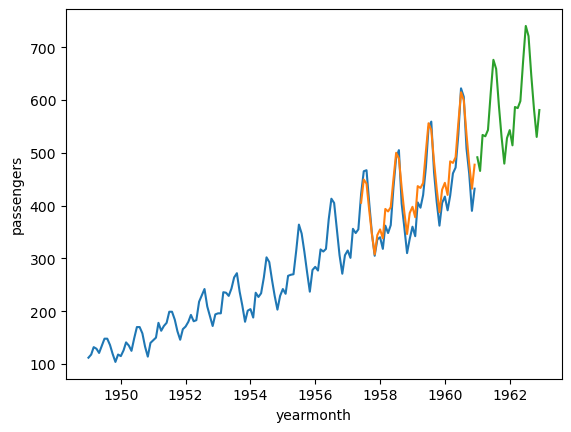

In [117]:
sns.lineplot(data=airP,x=airP.index,y='passengers')#blue...our original data (train+test)
sns.lineplot(data=airP,x=airP.index,y='sarimax')#orange,,,,,,prediction for test data which is subset of train data
sns.lineplot(x=future_dates.index,y=future_prediction)#green (predictions for our created dummy future dates)
#as u see going with the trend..